In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__
import cv2
import cv2 as cv
from PIL import Image
import pickle
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pickle
data = pickle.load(open("data4.pkl", "rb"))

In [4]:
model = pickle.load(open("model.pkl", "rb"))


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
data_embs = pickle.load(open("data_embs.pkl", "rb"))


In [6]:
cosine_sim = pickle.load(open("cosine.pkl", "rb"))


In [7]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return Data_Path+img

def load_image(img):
    return cv2.imread(img_path(img))

In [8]:
indices = pd.Series(range(len(data)), index=data.index)
indices

# Function that get clothes recommendations based on the cosine similarity score of micro categories
def get_recommender(idx, data, top_n = 6):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine_sim[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(2993, data, top_n = 6)

(Int64Index([2999, 2930, 3014, 2997, 2596, 2494], dtype='int64'),
 [0.89842683, 0.8852705, 0.84515655, 0.81852424, 0.8171154, 0.8120699])

In [9]:
Data_Path= '/Users/flatironschool/Downloads/part1/'

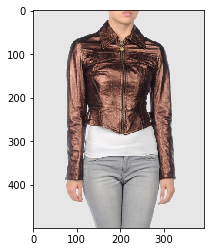

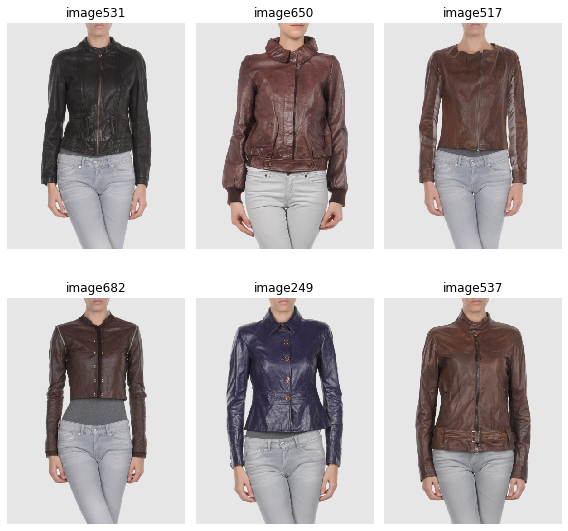

In [10]:
# Idx Item to Recommender
idx_ref = 100


# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, data, top_n = 6)

# Plot
plt.imshow(cv2.cvtColor(load_image(data.iloc[idx_ref].filename), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'image'+str(i): load_image(row.filename) for i, row in data.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)